<a href="https://colab.research.google.com/github/lungnahahd/Tensorflow_Prac/blob/main/ThreeNN_Pythn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)
i= 0 train acc, test acc | 0.11236666666666667, 0.1135
i= 600 train acc, test acc | 0.11236666666666667, 0.1135
i= 1200 train acc, test acc | 0.19246666666666667, 0.1967
i= 1800 train acc, test acc | 0.51525, 0.5153
i= 2400 train acc, test acc | 0.7630166666666667, 0.7677
i= 3000 train acc, test acc | 0.8368166666666667, 0.8411
i= 3600 train acc, test acc | 0.8691833333333333, 0.8702
i= 4200 train acc, test acc | 0.8877833333333334, 0.8887
i= 4800 train acc, test acc | 0.9037, 0.9035
i= 5400 train acc, test acc | 0.9141166666666667, 0.913
i= 6000 train acc, test acc | 0.9242333333333334, 0.925
i= 6600 train acc, test acc | 0.9317666666666666, 0.932
i= 7200 train acc, test acc | 0.9372333333333334, 0.9351
i= 7800 train acc, test acc | 0.9421333333333334, 0.9405
i= 8400 train acc, test acc | 0.9480833333333333, 0.9455
i= 9000 train acc, test acc | 0.9507333333333333, 0.9479
i= 9600 train acc, test acc | 0.9553666666666667, 0.9533


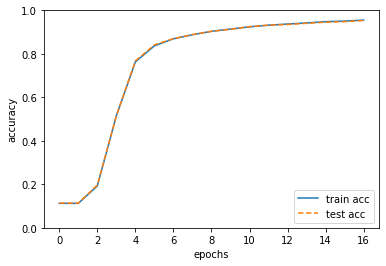

In [25]:
#################################################################
# Three-Layer NN (Numerical Differentiation)
#################################################################
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)
    
def relu(x):
   return np.maximum(0, x) 

def relu_grad(x):
    grad = np.zeros(x)
    grad[x>=0] = 1
    return grad


def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

def cross_entropy_error(y, t):
    if y.ndim ==1:
        t=t.reshape(1, t.size)
        y=y.reshape(1, y.size)   
    
    batch_size = y.shape[0]
    delta = 1e-7
    return -np.sum(t*np.log(y+delta)) / batch_size

def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 값 복원
        it.iternext()   
        
    return grad

class ThreeLayerNet:

    def __init__(self, input_size, first_hidden_size, second_hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, first_hidden_size)
        self.params['b1'] = np.zeros(first_hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(first_hidden_size, second_hidden_size)
        self.params['b2'] = np.zeros(second_hidden_size)
        self.params['W3'] = weight_init_std * np.random.randn(second_hidden_size, output_size)
        self.params['b3'] = weight_init_std * np.random.randn(output_size)

    def predict(self, x):
        W1, W2, W3 = self.params['W1'], self.params['W2'], self.params['W3']
        b1, b2, b3 = self.params['b1'], self.params['b2'], self.params['b3']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        z2 = sigmoid(a2)
        a3 = np.dot(z2, W3) + b3
        y = softmax(a3)
        
        return y

    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)

    def mse_loss(self, x, t):
        y = self.predict(x)
        sigmoid_grad(x)

    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        grads['W3'] = numerical_gradient(loss_W, self.params['W3'])
        grads['b3'] = numerical_gradient(loss_W, self.params['b3'])
        
        return grads
   
    def gradient(self, x, t):
        W1, W2, W3 = self.params['W1'], self.params['W2'], self.params['W3']
        b1, b2, b3 = self.params['b1'], self.params['b2'], self.params['b3']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        z2 = sigmoid(a2)
        a3 = np.dot(z2, W3) + b3
        y = softmax(a3)
        
        # backward
        dy = (y - t) / batch_num
        grads['W3'] = np.dot(z2.T, dy)
        grads['b3'] = np.sum(dy, axis=0)

        da2 = np.dot(dy, W3.T)
        dz2 = sigmoid_grad(a2) * da2
        grads['W2'] = np.dot(z1.T, dz2)
        grads['b2'] = np.sum(dz2, axis=0)

        da1 = np.dot(da2,W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

# 데이터 읽기
from mnist import load_mnist 

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=True, one_hot_label=True)
 

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)


network = ThreeLayerNet(input_size=784, first_hidden_size=300, second_hidden_size = 100 , output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    noise = np.random.rand(100).astype(np.float32)
    np.zeros_like(noise)
    
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2', 'W3', 'b3'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("i=", i, "train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [26]:
#
# Sample Test
#
id_test = 5

img=x_test[id_test]
label = t_test[id_test]
print(label)
out = network.predict(img)
out

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


array([1.70129385e-10, 9.91323611e-01, 1.63150200e-03, 4.69994946e-04,
       1.83675740e-05, 4.69303060e-05, 5.35459105e-06, 5.28482082e-03,
       1.04265012e-03, 1.76768054e-04])